In [46]:
import pandas as pd
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import json
from sklearn.cluster import KMeans


from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode 
from geopandas.tools import reverse_geocode  

%matplotlib inline

In [37]:
df = pd.read_csv("documents/AB_NYC_2019_midtown_final.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18393354,Midtown Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75358,-73.99190,Shared room,99,1,1,7/18/2018,0.08,2,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,6751450,Next to Empire State building,7209,Liz,Manhattan,Midtown,40.74642,-73.98516,Entire home/apt,220,3,108,6/21/2019,2.17,1,24
3,3654511,ROOFTOP SWIMMING-POOL 1/BR APT.,15784,Francesco,Manhattan,Midtown,40.75090,-73.96963,Entire home/apt,250,5,2,8/7/2017,0.04,1,0
4,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,4/30/2019,0.90,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,36029691,GRAMERCY + WIGWAM = FUN!!!,270620369,Bryan,Manhattan,Midtown,40.74188,-73.98419,Entire home/apt,650,3,0,NaN,NaN,1,337
1541,36104174,Stunning ! All new near U.N. & Central Park,271581236,Amir,Manhattan,Midtown,40.75720,-73.96464,Entire home/apt,179,30,0,NaN,NaN,1,242
1542,36200103,Quite boutique type time share,272243990,Victoria,Manhattan,Midtown,40.76358,-73.97825,Entire home/apt,180,1,0,NaN,NaN,1,57
1543,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,273812306,Kelly,Manhattan,Midtown,40.75288,-73.97269,Private room,380,3,0,NaN,NaN,1,3


In [38]:
df.count()

id                                1545
name                              1545
host_id                           1545
host_name                         1545
neighbourhood_group               1545
neighbourhood                     1545
latitude                          1545
longitude                         1545
room_type                         1545
price                             1545
minimum_nights                    1545
number_of_reviews                 1545
last_review                        986
reviews_per_month                  986
calculated_host_listings_count    1545
availability_365                  1545
dtype: int64

In [39]:
df.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       559
reviews_per_month                 559
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [40]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.619090,-0.035782,-0.052356,0.102109,-0.077003,-0.253632,0.346477,0.054000,0.176645
host_id,0.619090,1.000000,-0.080457,-0.050588,0.140044,-0.124316,-0.114506,0.338691,-0.015767,0.170553
latitude,-0.035782,-0.080457,1.000000,0.255687,0.064640,0.029559,-0.087397,-0.083854,0.040339,0.020679
longitude,-0.052356,-0.050588,0.255687,1.000000,0.033600,0.063822,0.011997,-0.095193,-0.028726,0.023792
price,0.102109,0.140044,0.064640,0.033600,1.000000,-0.023381,-0.117927,-0.081359,0.030932,0.183927
minimum_nights,-0.077003,-0.124316,0.029559,0.063822,-0.023381,1.000000,-0.101051,-0.151371,0.249876,0.245644
number_of_reviews,-0.253632,-0.114506,-0.087397,0.011997,-0.117927,-0.101051,1.000000,0.513481,-0.147238,-0.014980
reviews_per_month,0.346477,0.338691,-0.083854,-0.095193,-0.081359,-0.151371,0.513481,1.000000,-0.187103,0.041634
calculated_host_listings_count,0.054000,-0.015767,0.040339,-0.028726,0.030932,0.249876,-0.147238,-0.187103,1.000000,0.346746
availability_365,0.176645,0.170553,0.020679,0.023792,0.183927,0.245644,-0.014980,0.041634,0.346746,1.000000


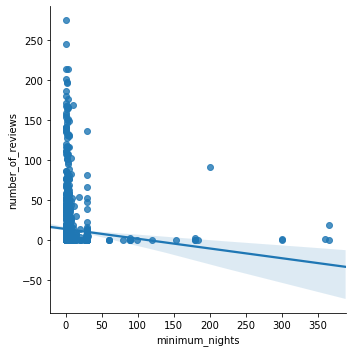

In [41]:
sns.lmplot(x='minimum_nights', y='number_of_reviews', data=df)

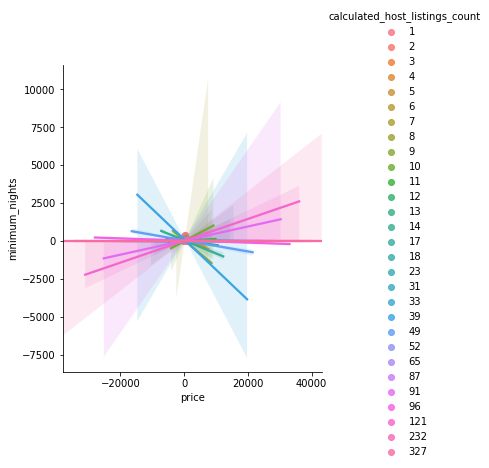

In [43]:
sns.lmplot(x='price', y='minimum_nights', data=df, fit_reg=True, hue='calculated_host_listings_count')

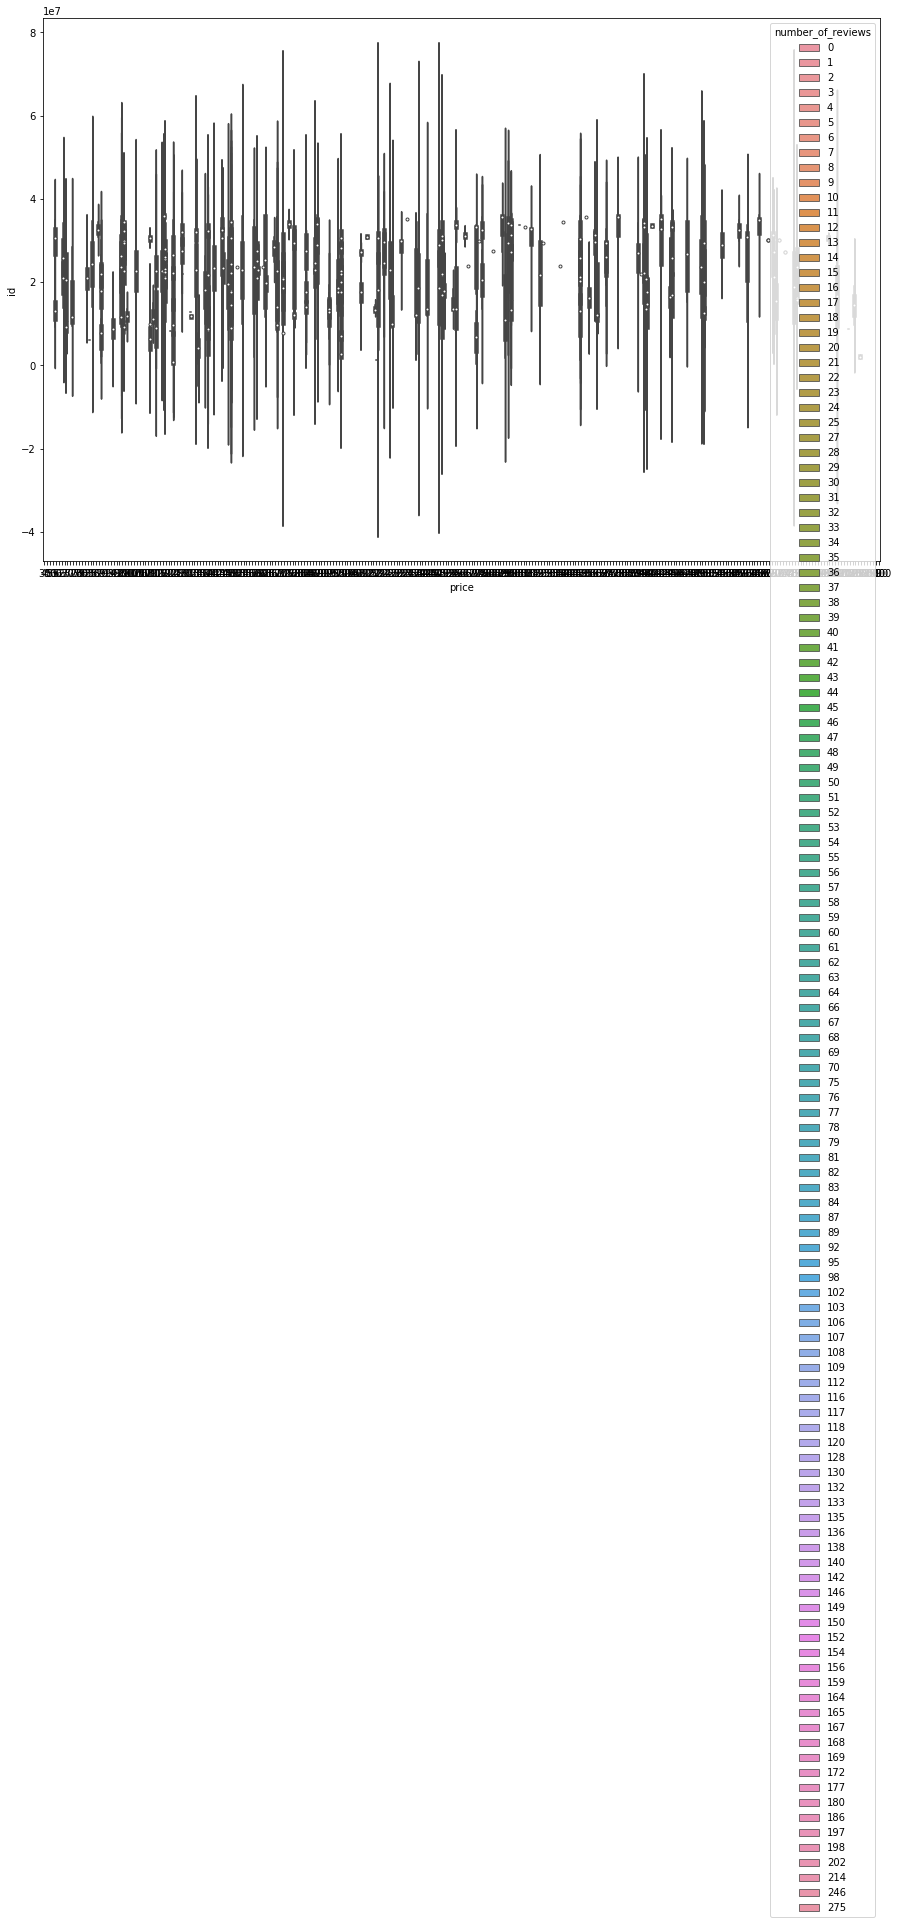

In [69]:
plt.subplots(figsize=(15,10))
sns.violinplot(x='price', y='id', data=df, hue = 'number_of_reviews')

In [73]:
bins = [0, 50, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

# Create names for the four groups
group_names = ['Cheap', 'Moderate', 'Middle', 'Reasonable', 'LowerEnd', 'MiddleEnd', 'HigherEnd', 'LowerStatus', 'MiddleStatus', 'HigherStatus', 'Poor', 'Rich', 'Expensive']

#make new column with letter grades
df['PriceRange'] = pd.cut(df['price'], bins, labels=group_names)

In [75]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,PriceRange
0,18393354,Midtown Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75358,-73.99190,Shared room,99,1,1,7/18/2018,0.08,2,365,Moderate
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,Middle
2,6751450,Next to Empire State building,7209,Liz,Manhattan,Midtown,40.74642,-73.98516,Entire home/apt,220,3,108,6/21/2019,2.17,1,24,Middle
3,3654511,ROOFTOP SWIMMING-POOL 1/BR APT.,15784,Francesco,Manhattan,Midtown,40.75090,-73.96963,Entire home/apt,250,5,2,8/7/2017,0.04,1,0,Middle
4,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,4/30/2019,0.90,1,140,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,36029691,GRAMERCY + WIGWAM = FUN!!!,270620369,Bryan,Manhattan,Midtown,40.74188,-73.98419,Entire home/apt,650,3,0,NaN,NaN,1,337,Reasonable
1541,36104174,Stunning ! All new near U.N. & Central Park,271581236,Amir,Manhattan,Midtown,40.75720,-73.96464,Entire home/apt,179,30,0,NaN,NaN,1,242,Middle
1542,36200103,Quite boutique type time share,272243990,Victoria,Manhattan,Midtown,40.76358,-73.97825,Entire home/apt,180,1,0,NaN,NaN,1,57,Middle
1543,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,273812306,Kelly,Manhattan,Midtown,40.75288,-73.97269,Private room,380,3,0,NaN,NaN,1,3,Middle


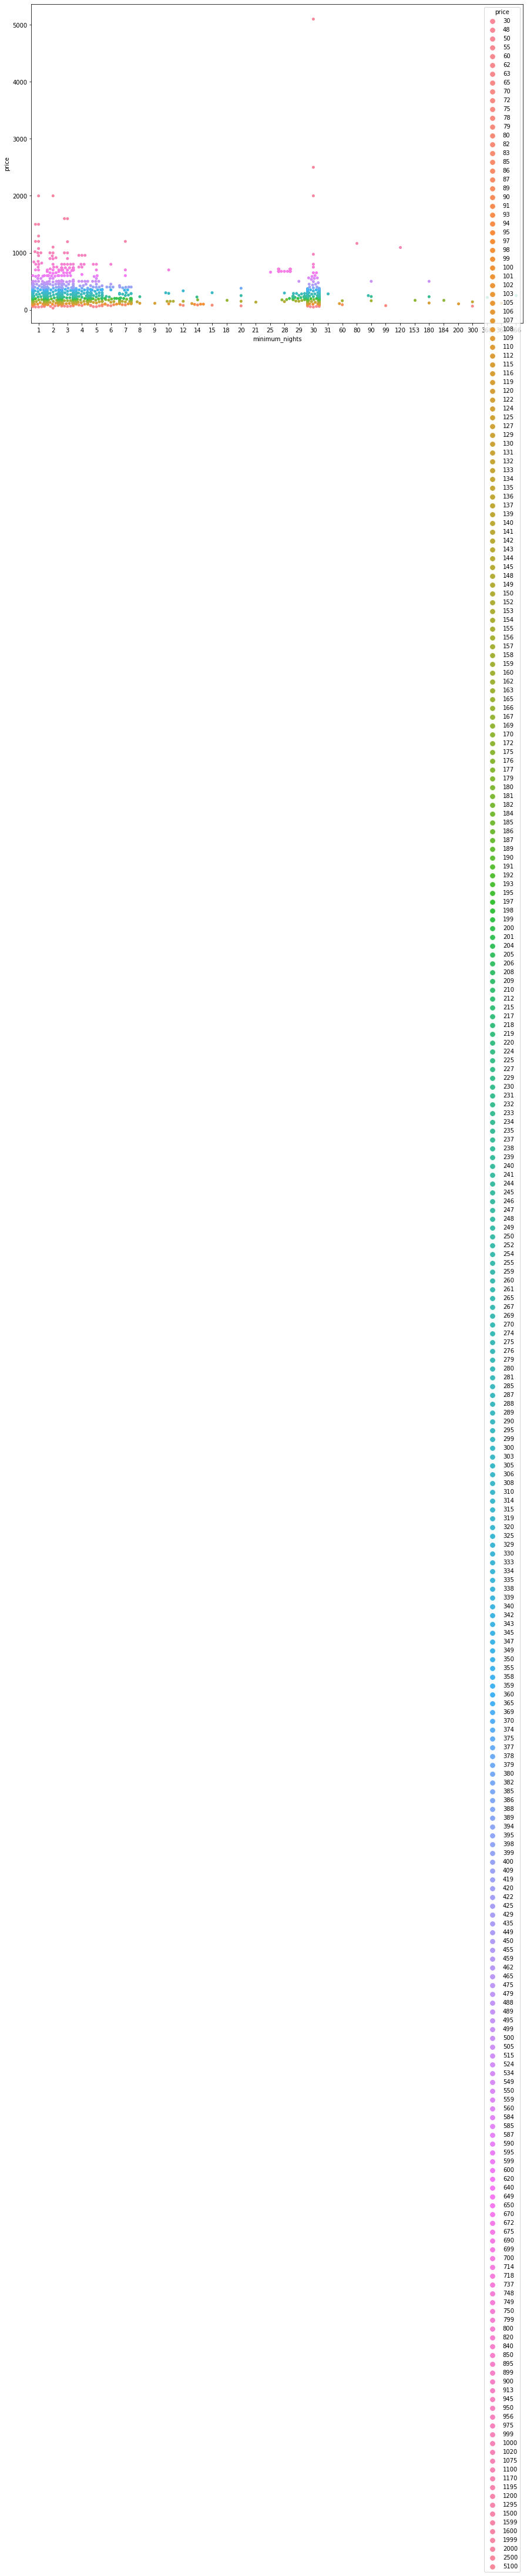

In [74]:
plt.subplots(figsize=(15,10))
sns.swarmplot(x='minimum_nights', y='price', data=df, hue = 'price')